In [51]:
#from fancyimpute import KNN

In [133]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [30]:
filename = 'dataset_diabetes/diabetic_data.csv'

In [34]:
data = pd.read_csv(filename)

In [98]:
y = data.loc[:, data.columns == "readmitted"]
X = data.drop(columns=["readmitted", "weight", "encounter_id", "patient_nbr"])

In [95]:
X.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [99]:
lb = LabelBinarizer()
one = OneHotEncoder()

In [100]:
y_transformed = lb.fit_transform(y)
lb.classes_

array(['<30', '>30', 'NO'], dtype='<U3')

In [101]:
X_clean = X.replace("?", np.nan)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_transformed, test_size=0.20)

In [103]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_unknown = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="Unknown")

In [104]:
X_unknown_train = imp_unknown.fit_transform(X_train)
X_unknown_test = imp_unknown.transform(X_test)

In [105]:
X_mode_train = imp_mode.fit_transform(X_train)

In [106]:
X_mode_test = imp_mode.transform(X_test)

In [107]:
X_drop_train = X_train.dropna(axis=1)
X_drop_test = X_test.dropna(axis=1)

In [110]:
enc_mode = OneHotEncoder(handle_unknown="ignore")
enc_unknown = OneHotEncoder(handle_unknown="ignore")
enc_drop = OneHotEncoder(handle_unknown="ignore")

In [112]:
X_unknown_train_c = enc_unknown.fit_transform(X_unknown_train)
X_unknown_test_c = enc_unknown.transform(X_unknown_test)

X_mode_train_c = enc_mode.fit_transform(X_mode_train)
X_mode_test_c = enc_mode.transform(X_mode_test)

X_drop_train_c = enc_drop.fit_transform(X_drop_train)
X_drop_test_c = enc_drop.transform(X_drop_test)

In [116]:
X_unknown_train_c.shape

(81412, 2734)

In [118]:
y_train.shape

(81412, 3)

In [124]:
classif = OneVsRestClassifier(LogisticRegression())
classif.fit(X_unknown_train_c, y_train)

/Users/kadams/Library/Python/3.5/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [125]:
classif.score(X_unknown_test_c, y_test)

0.4723887196619829

In [126]:
clf_unknown = OneVsRestClassifier(LogisticRegression()).fit(X_unknown_train_c, y_train)

/Users/kadams/Library/Python/3.5/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [127]:
clf_mode = OneVsRestClassifier(LogisticRegression()).fit(X_mode_train_c, y_train)

/Users/kadams/Library/Python/3.5/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [128]:
clf_drop = OneVsRestClassifier(LogisticRegression()).fit(X_drop_train_c, y_train)

/Users/kadams/Library/Python/3.5/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [130]:
print(clf_unknown.score(X_unknown_test_c, y_test))
print(clf_mode.score(X_mode_test_c, y_test))
print(clf_drop.score(X_drop_test_c, y_test))

0.4723887196619829
0.4727326324064066
0.4715535029969539


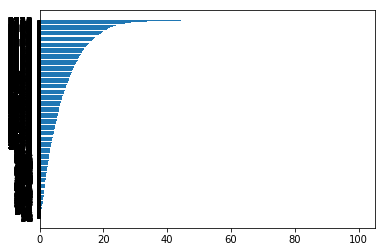

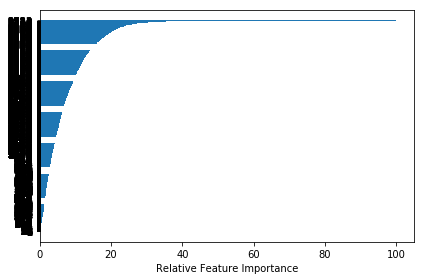

In [135]:
feature_importance = abs(clf_unknown.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
#featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [49]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(data.loc[:, data.columns != "readmitted"], data.loc[:, data.columns == "readmitted"])
#clf.predict(X[:2, :])

ValueError: could not convert string to float: 'No'

In [ ]:
int disp[2][4] = {
    {10, 11, 12, 13},
    {14, 15, 16, 17}
};

In [ ]:
 (1 / (delta_fil + 1)) * (1 / (delta_rnk + 1))

In [4]:
for delta_fil in range(0,9): 
    s = "{"
    for delta_rnk in range(0, 9):
        s += str((1 / (delta_fil + 1.0)) * (1 / (delta_rnk + 1.0))) + ','
        
    print(s[:-1]+"},")
        

{1.0,0.5,0.3333333333333333,0.25,0.2,0.16666666666666666,0.14285714285714285,0.125,0.1111111111111111},
{0.5,0.25,0.16666666666666666,0.125,0.1,0.08333333333333333,0.07142857142857142,0.0625,0.05555555555555555},
{0.3333333333333333,0.16666666666666666,0.1111111111111111,0.08333333333333333,0.06666666666666667,0.05555555555555555,0.047619047619047616,0.041666666666666664,0.037037037037037035},
{0.25,0.125,0.08333333333333333,0.0625,0.05,0.041666666666666664,0.03571428571428571,0.03125,0.027777777777777776},
{0.2,0.1,0.06666666666666667,0.05,0.04000000000000001,0.03333333333333333,0.02857142857142857,0.025,0.022222222222222223},
{0.16666666666666666,0.08333333333333333,0.05555555555555555,0.041666666666666664,0.03333333333333333,0.027777777777777776,0.023809523809523808,0.020833333333333332,0.018518518518518517},
{0.14285714285714285,0.07142857142857142,0.047619047619047616,0.03571428571428571,0.02857142857142857,0.023809523809523808,0.02040816326530612,0.017857142857142856,0.0158730158

In [5]:
ARR_WIDTH = 16

In [7]:
FIL_ORIGIN = 2

In [8]:
RNK_ORIGIN = ((ARR_WIDTH - BOARD_WIDTH) / 2)

In [17]:
for f in range(-1,9): 
    s = "{"
    for r in range(-1, 9):
        s += str(int(ARR_WIDTH * (FIL_ORIGIN + f) + RNK_ORIGIN + r)) + ','
        
    print(s[:-1]+"},")

{51,52,53,54,55,56,57,58,59,60},
{67,68,69,70,71,72,73,74,75,76},
{83,84,85,86,87,88,89,90,91,92},
{99,100,101,102,103,104,105,106,107,108},
{115,116,117,118,119,120,121,122,123,124},
{131,132,133,134,135,136,137,138,139,140},
{147,148,149,150,151,152,153,154,155,156},
{163,164,165,166,167,168,169,170,171,172},
{179,180,181,182,183,184,185,186,187,188},
{195,196,197,198,199,200,201,202,203,204},


In [18]:
FIL_MASK = 15
FIL_SHIFT = 4
RNK_MASK = 15
RNK_SHIFT = 0

In [26]:
s = "{"
for sq in range(51,205): 
    s += str(int(((sq >> FIL_SHIFT) & FIL_MASK) - FIL_ORIGIN)) + ','
        
print(s[:-1]+"}")

#fil_t f = ((sq >> FIL_SHIFT) & FIL_MASK) - FIL_ORIGIN;

#rnk_t r = ((sq >> RNK_SHIFT) & RNK_MASK) - RNK_ORIGIN;

{-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8}


In [29]:
s = "{"
for sq in range(51,205): 
    s += str(int(((sq >> RNK_SHIFT) & RNK_MASK) - RNK_ORIGIN)) + ','
print(s[:-1]+"}")

{-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8}
